## Import required modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 객체를 생성할 때 sparse 옵션을 이용해서 희소행렬로 리턴할지 밀집행렬로 리턴할지 설정
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [11]:
%pwd

'C:\\Users\\의원1\\git'

In [14]:
df = pd.read_csv("./mysql/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Null values와 불필요한 columns 제거 (결측값 제거)

In [16]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [19]:
# DataFrame에서 두 개의 column을 제거 (axis = 1, inplace = True / 열에 대해 적용하여 저장)
df.drop(['Unnamed: 0','Title'], axis=1, inplace=True)

# NaN 인 값을 소유한 row를 제외하며 axis=1 옵션을 추가하면 열을 삭제 
df.dropna(inplace = True)

# 결측값 제거 완료
df.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [30]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object

## Data 전처리

In [29]:
# 자바스크립트 정규표현식 이용한 replace html(<,>,", ' ,\n) 특수문자제거
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)","")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)','')
    ReviewText = ReviewText.str.replace('(&amp)','')
    ReviewText = ReviewText.str.replace('(&gt)','')
    ReviewText = ReviewText.str.replace('(&lt)','')
    ReviewText = ReviewText.str.replace('(\xa0)',' ')
    return ReviewText

df['Review Text'] = preprocess(df['Review Text'])

In [34]:
# TextBlob의 출력 : 극성 과 주관적
# Vader Sentiment 출력 : 네거티브 ( neg ), 중립 ( neu ), 포지티브 ( pos ) 및 복합
df['Polarity'] = df['Review Text'].apply(lambda x : TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x : len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x : len(str(x)))

In [35]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,word_count,review_len
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,53
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62,303
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,98,500
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,22,124
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,36,192


##  Most Postive, Neutral and Negative 극성 리뷰를 체크한다

#### Polarity == 1

In [51]:
cl = df.loc[df.Polarity == 1, ['Review Text']].sample(5).values

for c in cl:
    print(c[0])

My daughter had one and wore it with everything.i ended up getting one myself.it is a perfect weight.
Fits perfect.
Dress is awesome and makes you look skinnier.
This is a perfect jacket over any shirt, tee, or dress. jacket is well made and goes with anything!
Great purchase! i bought the coat to wear to work.


#### Polarity == 0

In [52]:
cl = df.loc[df.Polarity == 0, ['Review Text']].sample(5).values

for c in cl:
    print(c[0])

I tried on xs petites as someone had returned it . i didn't find that it ran small, it was ok on me. i am not sure if the regular size would work but i didn't end up purchasing this today as the color was jsut so-so on my skin tone.

likes: contrast and detail in ruffle, romantic

dislikes: the tag pulled on the fabric a bit and you could tell, so the fabric seemed fragile.
I am a true size small and i ordered this dress and it was way big. it's meant to be a relaxed fit, but it sagged under the arm-holes because the bust was way too big. some folks are saying it ran small and they are essentially the same measurements as me, so it makes me think there is possibly some variation in each size. i got on here to reorder in a smaller size, but now am not sure what to do as i need a dress with in the next three days!
These jeans are my favorite skinny jeans. they are expensive but so worth it. i had nordstrom reinforce holes with patches so they still look distressed but won't rip further. 

#### Polarity <= -0.7

In [55]:
cl = df.loc[df.Polarity <= -0.7, ['Review Text']].sample(5).values

for c in cl:
    print(c[0])

Cut out design, no seems or hems.
 very disappointed in retailer
The button fell off when i took it out of the bag, and i noticed that all of the thread had unraveled. will be returning :-(
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse
Awful color, horribly wrinkled and just a mess...so disappointed
What a disappointment and for the price, it's outrageous!


## Distribution of review sentiment polarity score

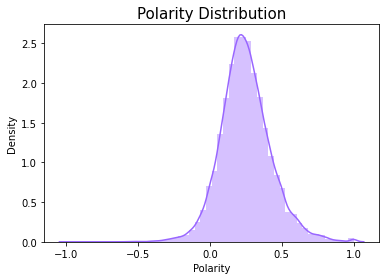

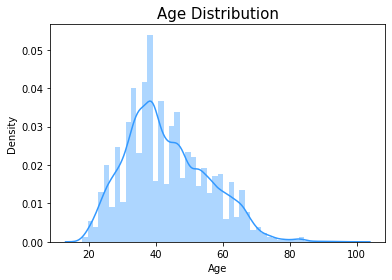

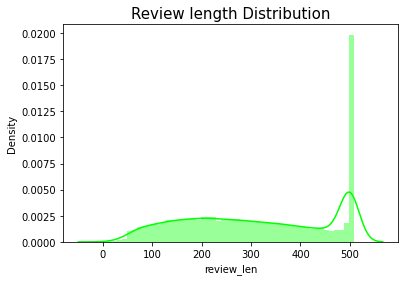

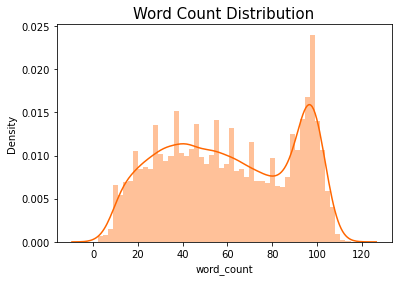

In [60]:
# columns = features , 제목, 색깔 지정
features = ['Polarity','Age','review_len','word_count']
titles = ['Polarity Distribution', 'Age Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

# Distribution with plt,seaborn
for feature, title, color in zip(features, titles, colors):
    # 선 그래프로 변화 추이를 나타내기 위한 시각화 툴
    sns.distplot(x=df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

**1. sentiment 극성 점수가 zero보다 높다. 그 의미는 대부분의 사람들이 매우 긍적적임을 나타낸다**  
**2. 대부분의 리뷰한 사람들의 나이는 30대에서 40대이다.**